## Import Libraries

In [28]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /Users/ikrar/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/ikrar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [70]:
import pandas as pd
import seaborn as sns
import re
import string
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import requests
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback

## Loading Dataset

In [30]:
df = pd.read_csv('reddit_reviews.csv')

In [31]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,2c1a38a5-2cfd-4e0d-9033-e1eca0905a72,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Good,5,0,2025.11.0,2025-04-05 05:27:43,NaN,NaN,2025.11.0
1,f41a1ad9-85ec-4e96-9d9d-739aaff6f844,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,nice,1,0,NaN,2025-04-05 05:15:05,NaN,NaN,NaN
2,4c77a674-64e7-457d-a7be-f7a51740c881,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,my custom feeds will not load at all I have un...,2,0,NaN,2025-04-05 05:13:44,NaN,NaN,NaN
3,31a27ce0-a7d2-4034-a18c-0aa0d6341037,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,so lovely,1,0,2025.13.0,2025-04-05 05:13:14,NaN,NaN,2025.13.0
4,0ccf9cae-f531-4d33-983b-1c92f4929952,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,my account with 2 innocuous comments on it got...,3,0,2025.13.0,2025-04-05 05:07:14,NaN,NaN,2025.13.0


In [32]:
df.tail()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
79995,178a81cc-171b-4922-bbd1-9579982e7327,Toreno Wise,https://play-lh.googleusercontent.com/a/ACg8oc...,resourceful,4,0,2024.50.0,2025-01-07 00:30:30,NaN,NaN,2024.50.0
79996,043e193f-6129-4994-a5c9-cde2cfeaaabd,leeweesquee,https://play-lh.googleusercontent.com/a/ACg8oc...,"Reddit admins very power hungry, no way to rep...",1,1,2024.08.0,2025-01-07 00:29:28,NaN,NaN,2024.08.0
79997,53acb321-ad98-4284-be6f-610e648085a5,Janiel Bower,https://play-lh.googleusercontent.com/a-/ALV-U...,it's nice to find what you like to watch I hon...,5,1,2024.50.0,2025-01-07 00:25:42,NaN,NaN,2024.50.0
79998,edf45e2e-c790-4bdb-adb9-2837206a9fab,KoolBreeze McMillin,https://play-lh.googleusercontent.com/a-/ALV-U...,informative and hilarious at the same time,5,0,2024.50.0,2025-01-07 00:19:31,NaN,NaN,2024.50.0
79999,884fce71-7fe2-4962-bde3-d30ec0370900,Julian Diaz-Cobo,https://play-lh.googleusercontent.com/a-/ALV-U...,New updates for security reasons monitor log i...,1,5,2024.50.0,2025-01-07 00:14:53,NaN,NaN,2024.50.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              80000 non-null  object
 1   userName              80000 non-null  object
 2   userImage             80000 non-null  object
 3   content               80000 non-null  object
 4   score                 80000 non-null  int64 
 5   thumbsUpCount         80000 non-null  int64 
 6   reviewCreatedVersion  69651 non-null  object
 7   at                    80000 non-null  object
 8   replyContent          16 non-null     object
 9   repliedAt             16 non-null     object
 10  appVersion            69651 non-null  object
dtypes: int64(2), object(9)
memory usage: 6.7+ MB


## Preprocessing Data

### Cleaning Data

In [34]:
clean_df = df.drop(['replyContent', 'repliedAt'], axis=1)

In [35]:
clean_df = clean_df.drop_duplicates()

In [36]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10002 entries, 0 to 59000
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              10002 non-null  object
 1   userName              10002 non-null  object
 2   userImage             10002 non-null  object
 3   content               10002 non-null  object
 4   score                 10002 non-null  int64 
 5   thumbsUpCount         10002 non-null  int64 
 6   reviewCreatedVersion  8708 non-null   object
 7   at                    10002 non-null  object
 8   appVersion            8708 non-null   object
dtypes: int64(2), object(7)
memory usage: 781.4+ KB


In [37]:
clean_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,2c1a38a5-2cfd-4e0d-9033-e1eca0905a72,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Good,5,0,2025.11.0,2025-04-05 05:27:43,2025.11.0
1,f41a1ad9-85ec-4e96-9d9d-739aaff6f844,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,nice,1,0,NaN,2025-04-05 05:15:05,NaN
2,4c77a674-64e7-457d-a7be-f7a51740c881,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,my custom feeds will not load at all I have un...,2,0,NaN,2025-04-05 05:13:44,NaN
3,31a27ce0-a7d2-4034-a18c-0aa0d6341037,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,so lovely,1,0,2025.13.0,2025-04-05 05:13:14,2025.13.0
4,0ccf9cae-f531-4d33-983b-1c92f4929952,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,my account with 2 innocuous comments on it got...,3,0,2025.13.0,2025-04-05 05:07:14,2025.13.0


### Preprocessing Text

In [38]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r"http\S+", '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
 
    text = text.replace('\n', ' ')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip(' ')
    return text

def casefoldingText(text):
    text = text.lower()
    return text
 
def tokenizingText(text):
    text = word_tokenize(text)
    return text
 
def filteringText(text):
    listStopwords = set(stopwords.words('english'))
    listStopwords.update(['gonna', 'wanna', 'gotta', 'imma', 'yea', 'nah', 'lol', 'wtf', 'omg', 'tbh', 'idk', 'rn', 'fr'])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text
 
def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
 
    stemmed_text = ' '.join(stemmed_words)
 
    return stemmed_text
 
def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

In [39]:
slangwords = {
    "u": "you",
    "ur": "your",
    "r": "are",
    "n": "and",
    "y": "why",
    "b": "be",
    "bc": "because",
    "bcz": "because",
    "cuz": "because",
    "cause": "because",
    "pls": "please",
    "plz": "please",
    "thx": "thanks",
    "ty": "thank you",
    "rly": "really",
    "imo": "in my opinion",
    "idk": "i do not know",
    "nvm": "never mind",
    "dm": "direct message",
    "app": "application",
    "pic": "picture",
    "pics": "pictures",
    "vid": "video",
    "vids": "videos"
}

def fix_slangwords(text):
    words = text.split()
    fixed_words = []
 
    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)
 
    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [40]:
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [41]:
clean_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,2c1a38a5-2cfd-4e0d-9033-e1eca0905a72,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Good,5,0,2025.11.0,2025-04-05 05:27:43,2025.11.0,Good,good,good,[good],[good],good
1,f41a1ad9-85ec-4e96-9d9d-739aaff6f844,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,nice,1,0,NaN,2025-04-05 05:15:05,NaN,nice,nice,nice,[nice],[nice],nice
2,4c77a674-64e7-457d-a7be-f7a51740c881,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,my custom feeds will not load at all I have un...,2,0,NaN,2025-04-05 05:13:44,NaN,my custom feeds will not load at all I have un...,my custom feeds will not load at all i have un...,my custom feeds will not load at all i have un...,"[my, custom, feeds, will, not, load, at, all, ...","[custom, feeds, load, uninstall, application, ...",custom feeds load uninstall application reinst...
3,31a27ce0-a7d2-4034-a18c-0aa0d6341037,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,so lovely,1,0,2025.13.0,2025-04-05 05:13:14,2025.13.0,so lovely,so lovely,so lovely,"[so, lovely]",[lovely],lovely
4,0ccf9cae-f531-4d33-983b-1c92f4929952,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,my account with 2 innocuous comments on it got...,3,0,2025.13.0,2025-04-05 05:07:14,2025.13.0,my account with innocuous comments on it got ...,my account with innocuous comments on it got ...,my account with innocuous comments on it got p...,"[my, account, with, innocuous, comments, on, i...","[account, innocuous, comments, got, perma, ban...",account innocuous comments got perma banned ap...


## Labeling Data


Sentiment Distribution:
sentiment
positive    5348
neutral     2459
negative    2195
Name: count, dtype: int64


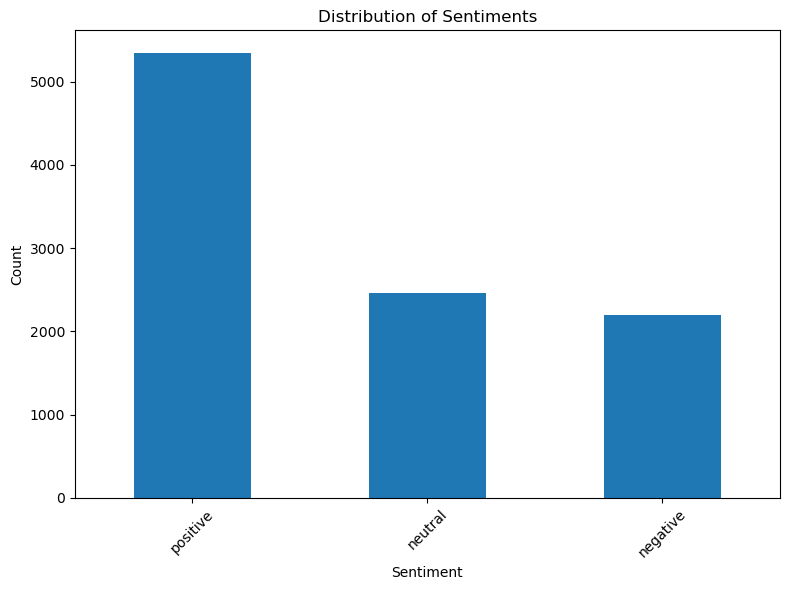

In [42]:
response = requests.get('https://raw.githubusercontent.com/jeffreybreen/twitter-sentiment-analysis-tutorial-201107/master/data/opinion-lexicon-English/positive-words.txt')
lexicon_positive = {word.strip(): 1 for word in response.text.split('\n') if word.strip() and not word.startswith(';')}

response = requests.get('https://raw.githubusercontent.com/jeffreybreen/twitter-sentiment-analysis-tutorial-201107/master/data/opinion-lexicon-English/negative-words.txt')
lexicon_negative = {word.strip(): -1 for word in response.text.split('\n') if word.strip() and not word.startswith(';')}

def sentiment_analysis_lexicon(text):
    score = 0
    words = text if isinstance(text, list) else text.split()
    
    for word in words:
        if word in lexicon_positive:
            score += 1
        elif word in lexicon_negative:
            score -= 1
    
    if score > 0:
        polarity = 'positive'
    elif score < 0:
        polarity = 'negative'
    else:
        polarity = 'neutral'
    
    return score, polarity

results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon)
results = list(zip(*results))
clean_df['sentiment_score'] = results[0]
clean_df['sentiment'] = results[1]

print("\nSentiment Distribution:")
print(clean_df['sentiment'].value_counts())

plt.figure(figsize=(8, 6))
clean_df['sentiment'].value_counts().plot(kind='bar')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Label Exploration

In [43]:
def create_wordcloud(text_data, title):
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        max_words=100,
        contour_width=3,
        contour_color='steelblue'
    ).generate(' '.join(text_data))
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

def get_top_words(text_data, n=10):
    words = ' '.join(text_data).split()
    return pd.DataFrame(Counter(words).most_common(n), columns=['Word', 'Count'])

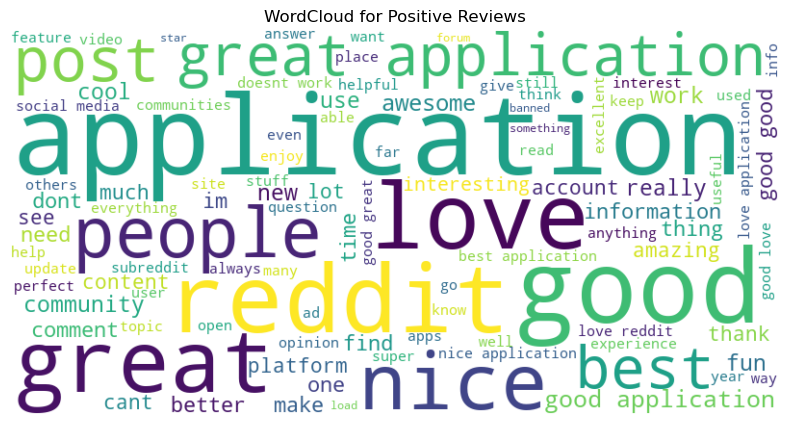

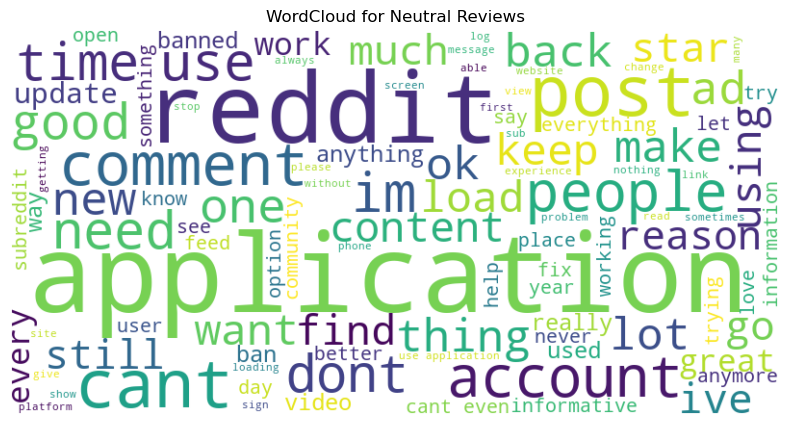

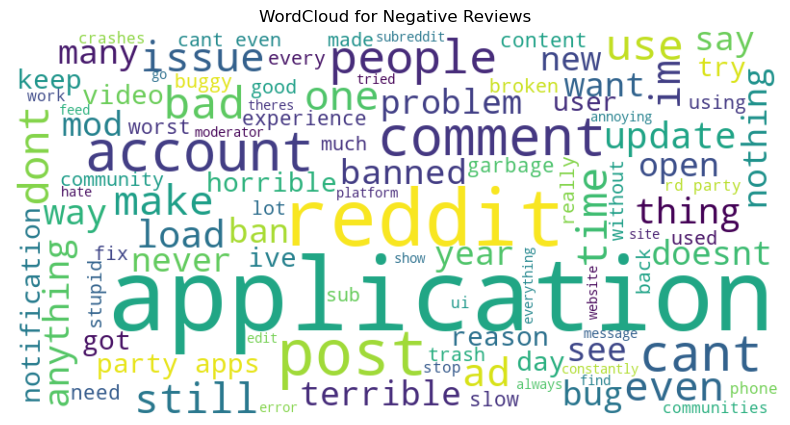

In [44]:
for sentiment in ['positive', 'neutral', 'negative']:
    text_data = clean_df[clean_df['sentiment'] == sentiment]['text_akhir']
    create_wordcloud(text_data, f'WordCloud for {sentiment.title()} Reviews')

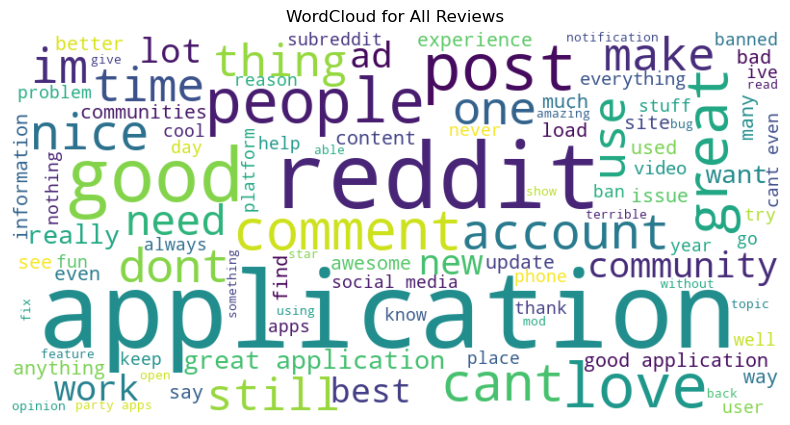

In [45]:
create_wordcloud(clean_df['text_akhir'], 'WordCloud for All Reviews')

### Callback Function

In [46]:
class Acc92Callback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        train_acc = logs.get("accuracy")
        val_acc = logs.get("val_accuracy")
        if train_acc is not None and val_acc is not None:
            if train_acc >= 0.92 and val_acc >= 0.92:
                print(f"\n🎉 Stopping early at epoch {epoch+1} - Acc > 92% (Train: {train_acc:.4f}, Val: {val_acc:.4f})")
                self.model.stop_training = True

## Experiment 1: TF-IDF + Multilayer Perceptron (MLP) with 80/20 split

###  Data Splitting & Feature Extraction

In [66]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(clean_df['text_akhir']).toarray().astype(np.float32)

In [67]:
le = LabelEncoder()
y = le.fit_transform(clean_df['sentiment'])

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modeling

In [ ]:
y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

model = Sequential([
    Dense(512, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/Users/ikrar/Dicoding/Belajar Pengembangan Machine Learning/Submission Analisis Sentimen/env/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Training

In [74]:
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_test, y_test_cat),
    epochs=50,
    batch_size=128,
    callbacks=[Acc92Callback()],
    verbose=1
)

Epoch 1/50
28/63 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.4933 - loss: 1.0462

KeyboardInterrupt: 

### Evaluation


✅ Akurasi Training Set: 99.84%
✅ Akurasi Testing Set: 86.46%
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.84      0.85       457
     neutral       0.72      0.77      0.74       478
    positive       0.94      0.92      0.93      1066

    accuracy                           0.86      2001
   macro avg       0.84      0.84      0.84      2001
weighted avg       0.87      0.86      0.87      2001



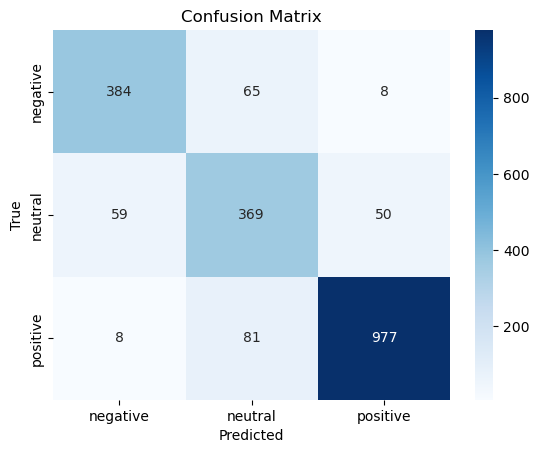

In [62]:
train_loss, train_acc = model.evaluate(X_train, y_train_cat, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)

print(f"\n✅ Akurasi Training Set: {train_acc * 100:.2f}%")
print(f"✅ Akurasi Testing Set: {test_acc * 100:.2f}%")

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=le.classes_))

cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

## Experiment 2: Word Embedding + LSTM With 80/20 Split

### Data Splitting & Feature Extraction

In [63]:
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(clean_df['text_akhir'])
sequences = tokenizer.texts_to_sequences(clean_df['text_akhir'])

X = pad_sequences(sequences, maxlen=100)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(clean_df['sentiment'])
y_cat = to_categorical(y, num_classes=3)

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

### Modeling

In [64]:
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=100),
    LSTM(128),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.build(input_shape=(None, 100))
model.summary()

/Users/ikrar/Dicoding/Belajar Pengembangan Machine Learning/Submission Analisis Sentimen/env/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 128)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 771,971 (2.94 MB)

 Trainable params: 771,971 (2.94 MB)

 Non-trainable params: 0 (0.00 B)

In [65]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=128,
    callbacks=[Acc92Callback()],
    verbose=1
)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 175ms/step - accuracy: 0.5392 - loss: 0.9535 - val_accuracy: 0.7461 - val_loss: 0.6588
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - accuracy: 0.7770 - loss: 0.5531 - val_accuracy: 0.7886 - val_loss: 0.5059
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step - accuracy: 0.8843 - loss: 0.3111 - val_accuracy: 0.8776 - val_loss: 0.3338
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - accuracy: 0.9468 - loss: 0.1613 - val_accuracy: 0.8866 - val_loss: 0.3209
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step - accuracy: 0.9677 - loss: 0.1044 - val_accuracy: 0.8846 - val_loss: 0.3444
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 158ms/step - accuracy: 0.9817 - loss: 0.0691 - val_accuracy: 0.8766 - val_loss: 0.4074
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 171ms/step - accuracy: 0.9886 - loss: 0.0504 - val_accuracy: 0.8796 - val_loss: 0.4841
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - accuracy: 0.9860 - loss: 0.0509 - val_accura

### Evaluation

In [ ]:
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f"\n✅ Akurasi Training Set: {train_acc * 100:.2f}%")
print(f"✅ Akurasi Testing Set: {test_acc * 100:.2f}%")

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=le.classes_))

cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

## Experiment 3

### Data Splitting & Feature Selection

### Modeling
